In [3]:
import matplotlib.pyplot as plt

In [4]:
def get_coordinates(file):
    coor = {}
    with open(file, 'r') as f:
        lines = f.read().splitlines()
        header_index = lines.index('NODE_COORD_SECTION')
        eof_index = lines.index('EOF')
        for line in lines[header_index+1:eof_index]:
            tmp = [float(el) for el in line.strip().split(' ') if el != '']
            coor[int(tmp[0])-1] = tmp[1:]
    return coor

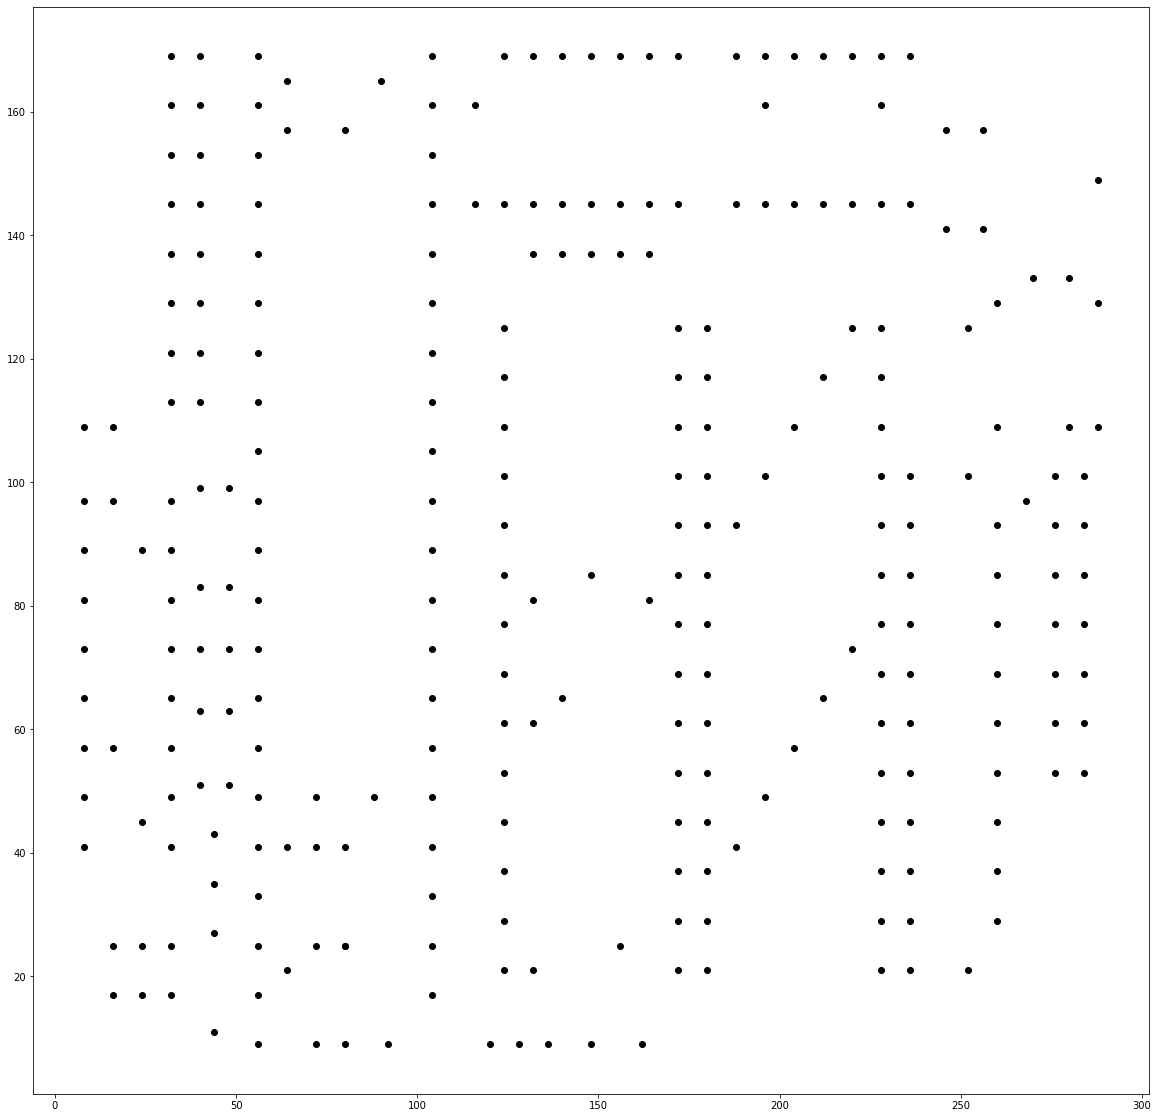

In [5]:
coor = get_coordinates(file='/Users/hangyeolsun/workspace/kaist.sbse/tsp/tsp_file/a280.tsp')
x, y = [], []
for key, value in coor.items():
    x.append(value[0])
    y.append(value[1])
plt.figure(figsize=(20,20))
plt.plot(x, y, 'o', color='black')

In [14]:
with open('/Users/hangyeolsun/workspace/kaist.sbse/tsp/a280_test.txt', 'r') as f:
    lines = f.readlines()
ret = [int(l.replace('\n', ''))-1 for l in lines]
#ret = [int(l.strip()) for l in lines[0].split(',')]

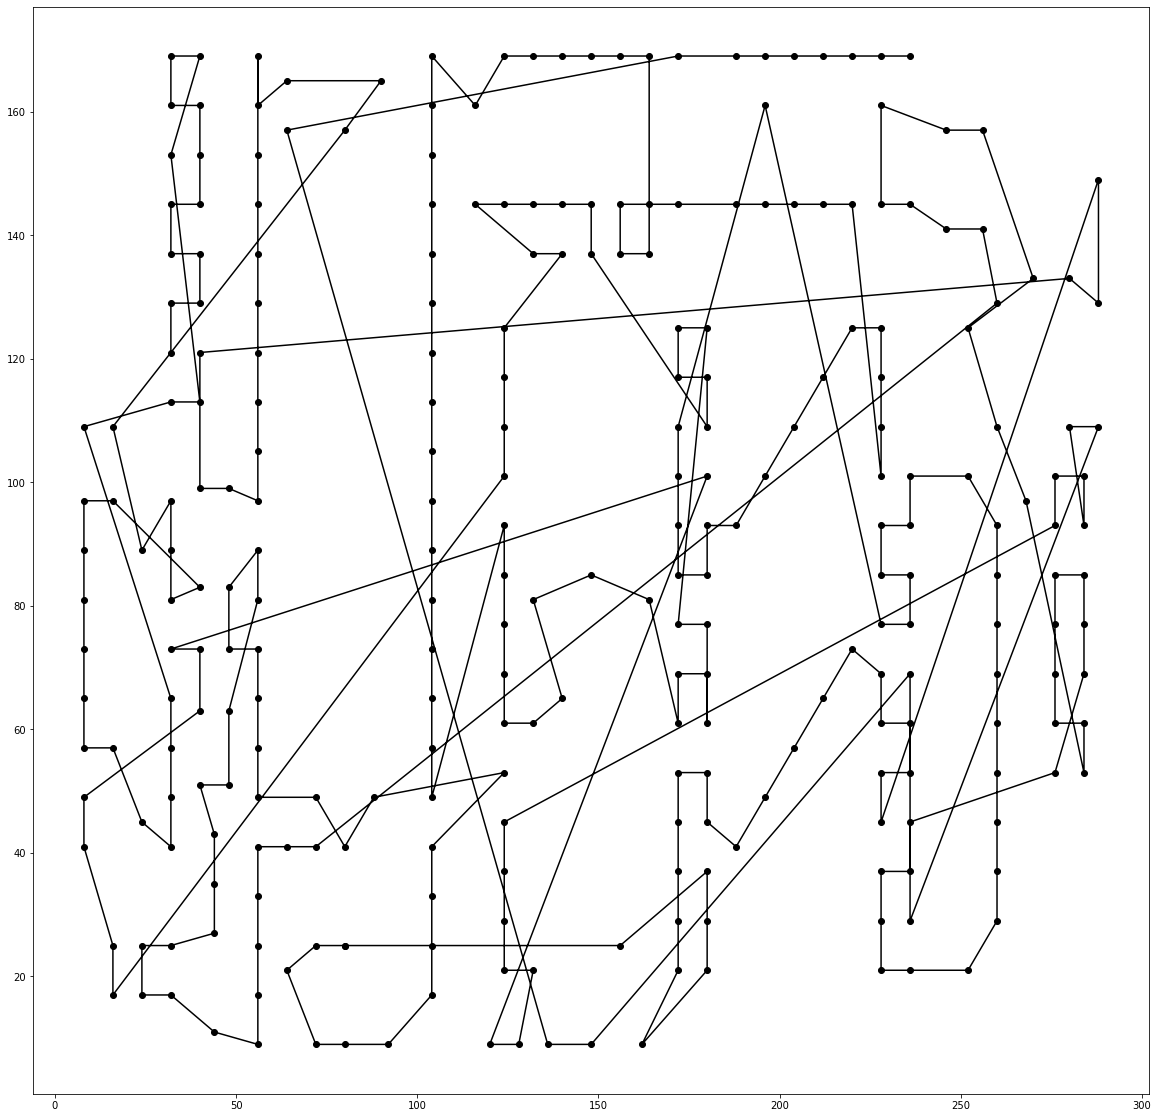

In [23]:
x_re = [coor[r][0] for r in ret]
y_re = [coor[r][1] for r in ret]
plt.figure(figsize=(20,20))
plt.plot(x_re, y_re, linestyle='-', marker='o', color='black')


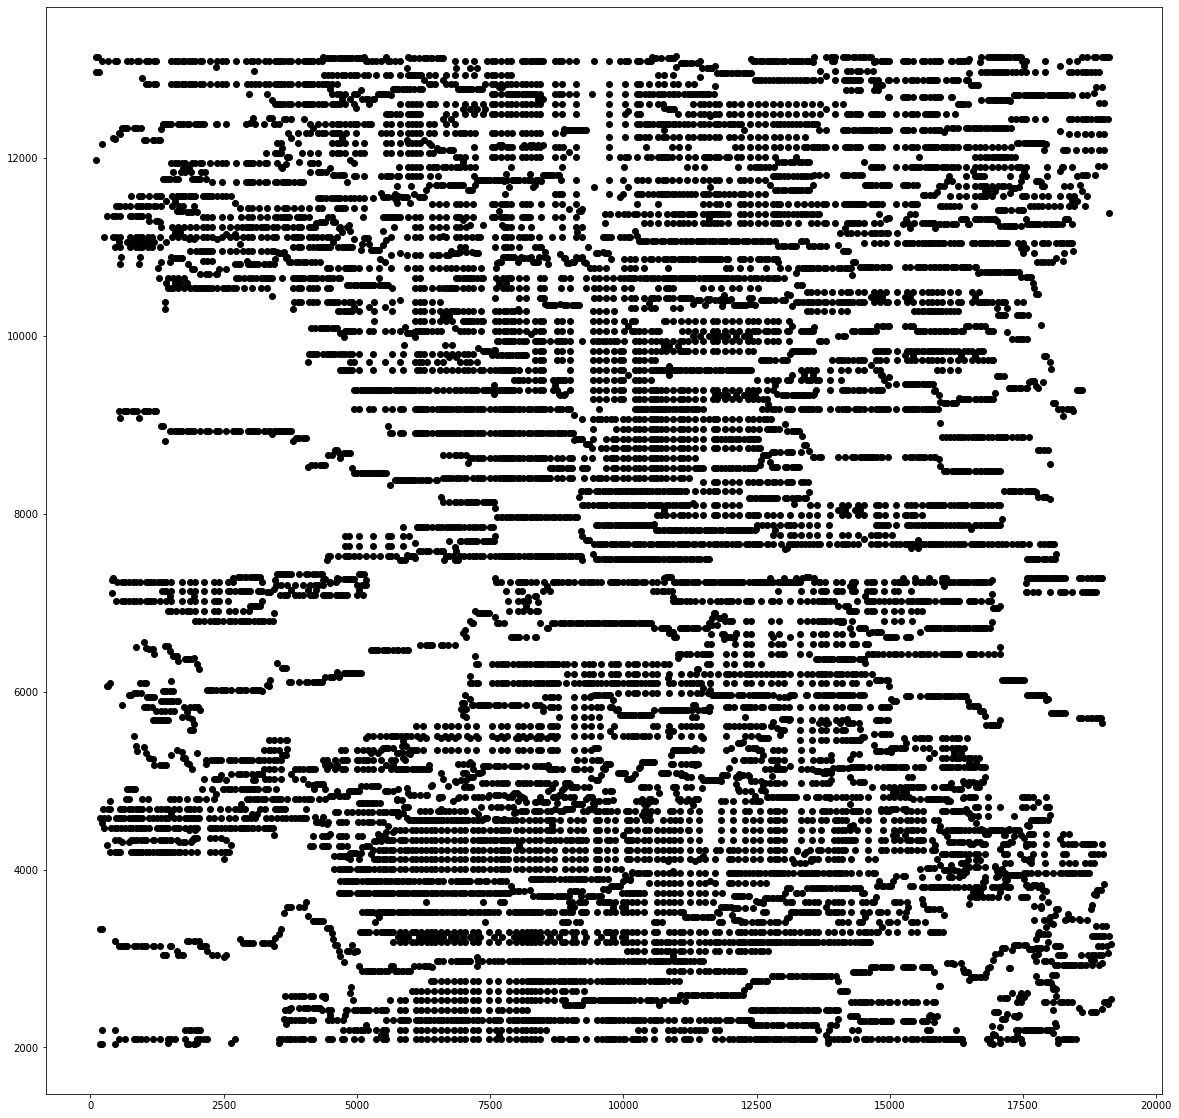

In [25]:
coor = get_coordinates(file='/Users/hangyeolsun/workspace/kaist.sbse/tsp/tsp_file/rl11849.tsp')
x, y = [], []
for key, value in coor.items():
    x.append(value[0])
    y.append(value[1])
plt.figure(figsize=(20,20))
plt.plot(x, y, 'o', color='black')

In [36]:
with open('/Users/hangyeolsun/workspace/kaist.sbse/tsp/solution/rl11849/solution_1627542510.txt', 'r') as f:
    lines = f.readlines()
    
ret = [int(l.replace('\n',''))-1 for l in lines]

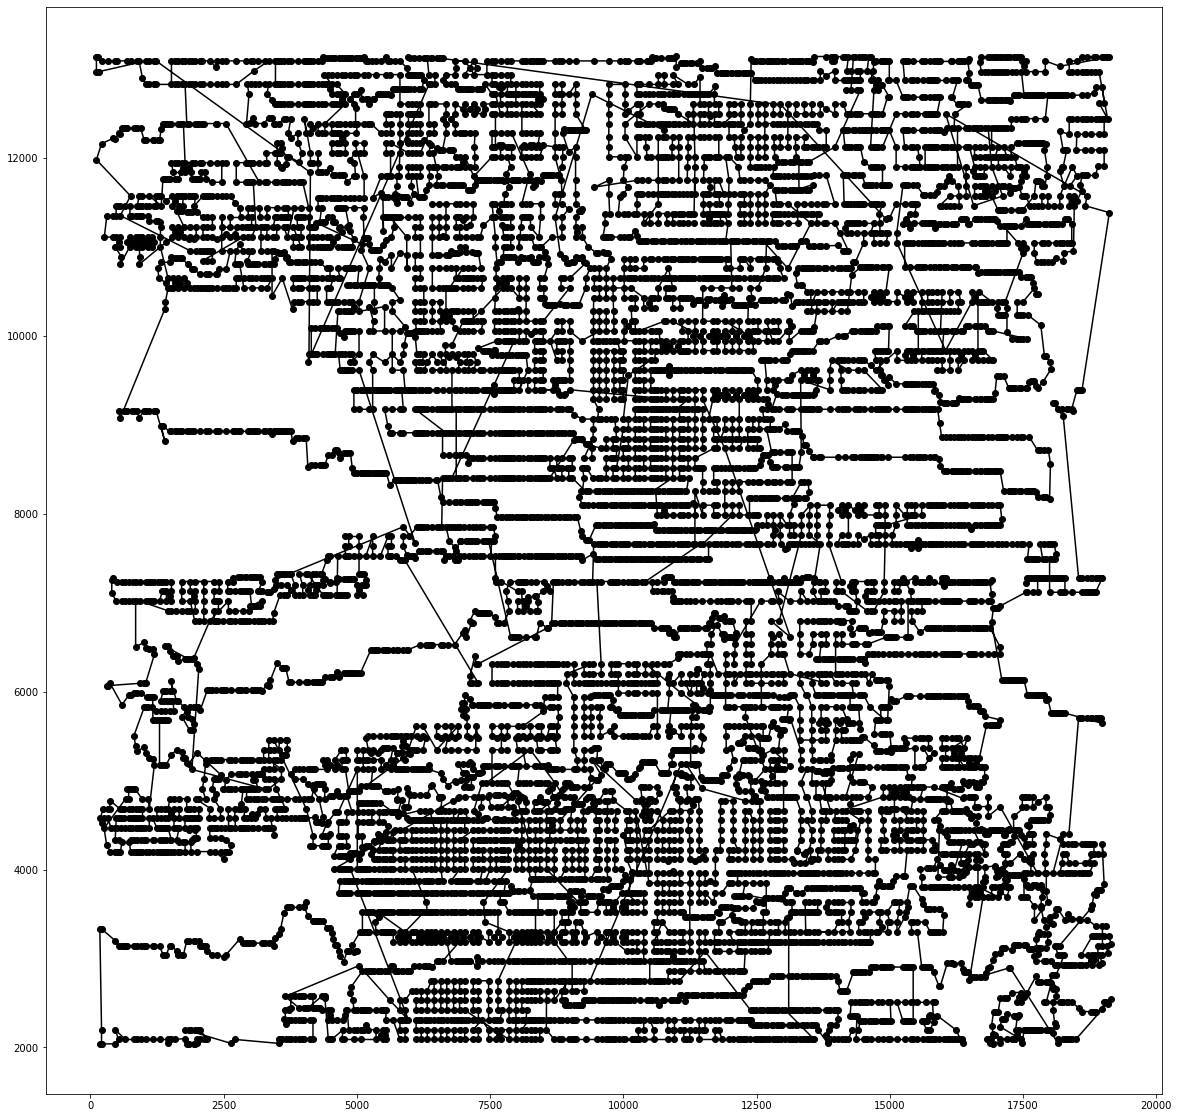

In [37]:
x_re = [coor[r][0] for r in ret]
y_re = [coor[r][1] for r in ret]
plt.figure(figsize=(20,20))
plt.plot(x_re, y_re, linestyle='-', marker='o', color='black')

In [1]:
with open('/Users/hangyeolsun/workspace/kaist.sbse/tsp/a280_test.txt', 'r') as f:
    lines = f.readlines()
    
ret = [int(l.strip())+1 for l in lines[0].split(',')]
with open('/Users/hangyeolsun/workspace/kaist.sbse/tsp/a280_test.txt', 'w') as f:
    for l in ret:
        f.write(str(l))
        f.write('\n')

In [37]:
with open('/Users/hangyeolsun/workspace/kaist.sbse/tsp/rl11849.tsp', 'r') as f:
    lines = f.readlines()


In [38]:
header_idx = lines.index('NODE_COORD_SECTION\n')
eof_idx = lines.index('EOF')
lines = lines[header_idx+1:eof_idx]
lines = [l.replace('\n', '').split() for l in lines]
lines = [l for l in lines if len(l) != 0]
lines = [l[1:] for l in lines]

In [39]:
with open('/Users/hangyeolsun/workspace/kaist.sbse/Travelling_Salesman_Optimization/test_data/cities_11849.data', 'w') as f:
    for l in lines:
        f.write(' '.join(l))
        f.write('\n')

In [17]:
import pickle
import networkx as nx

In [18]:
with open('./dist_cnt.pkl', 'rb') as f:
    distances = pickle.load(f)

In [19]:
G=nx.Graph()
G.add_nodes_from(coor.keys())

In [20]:
for n, p in coor.items():
    G.nodes[n]['pos'] = p

In [21]:
for n, p in distances.items():
    G.add_edge(n[0], n[1], weight=p[1])

In [80]:
G.nodes[0]

{'pos': [288.0, 149.0]}

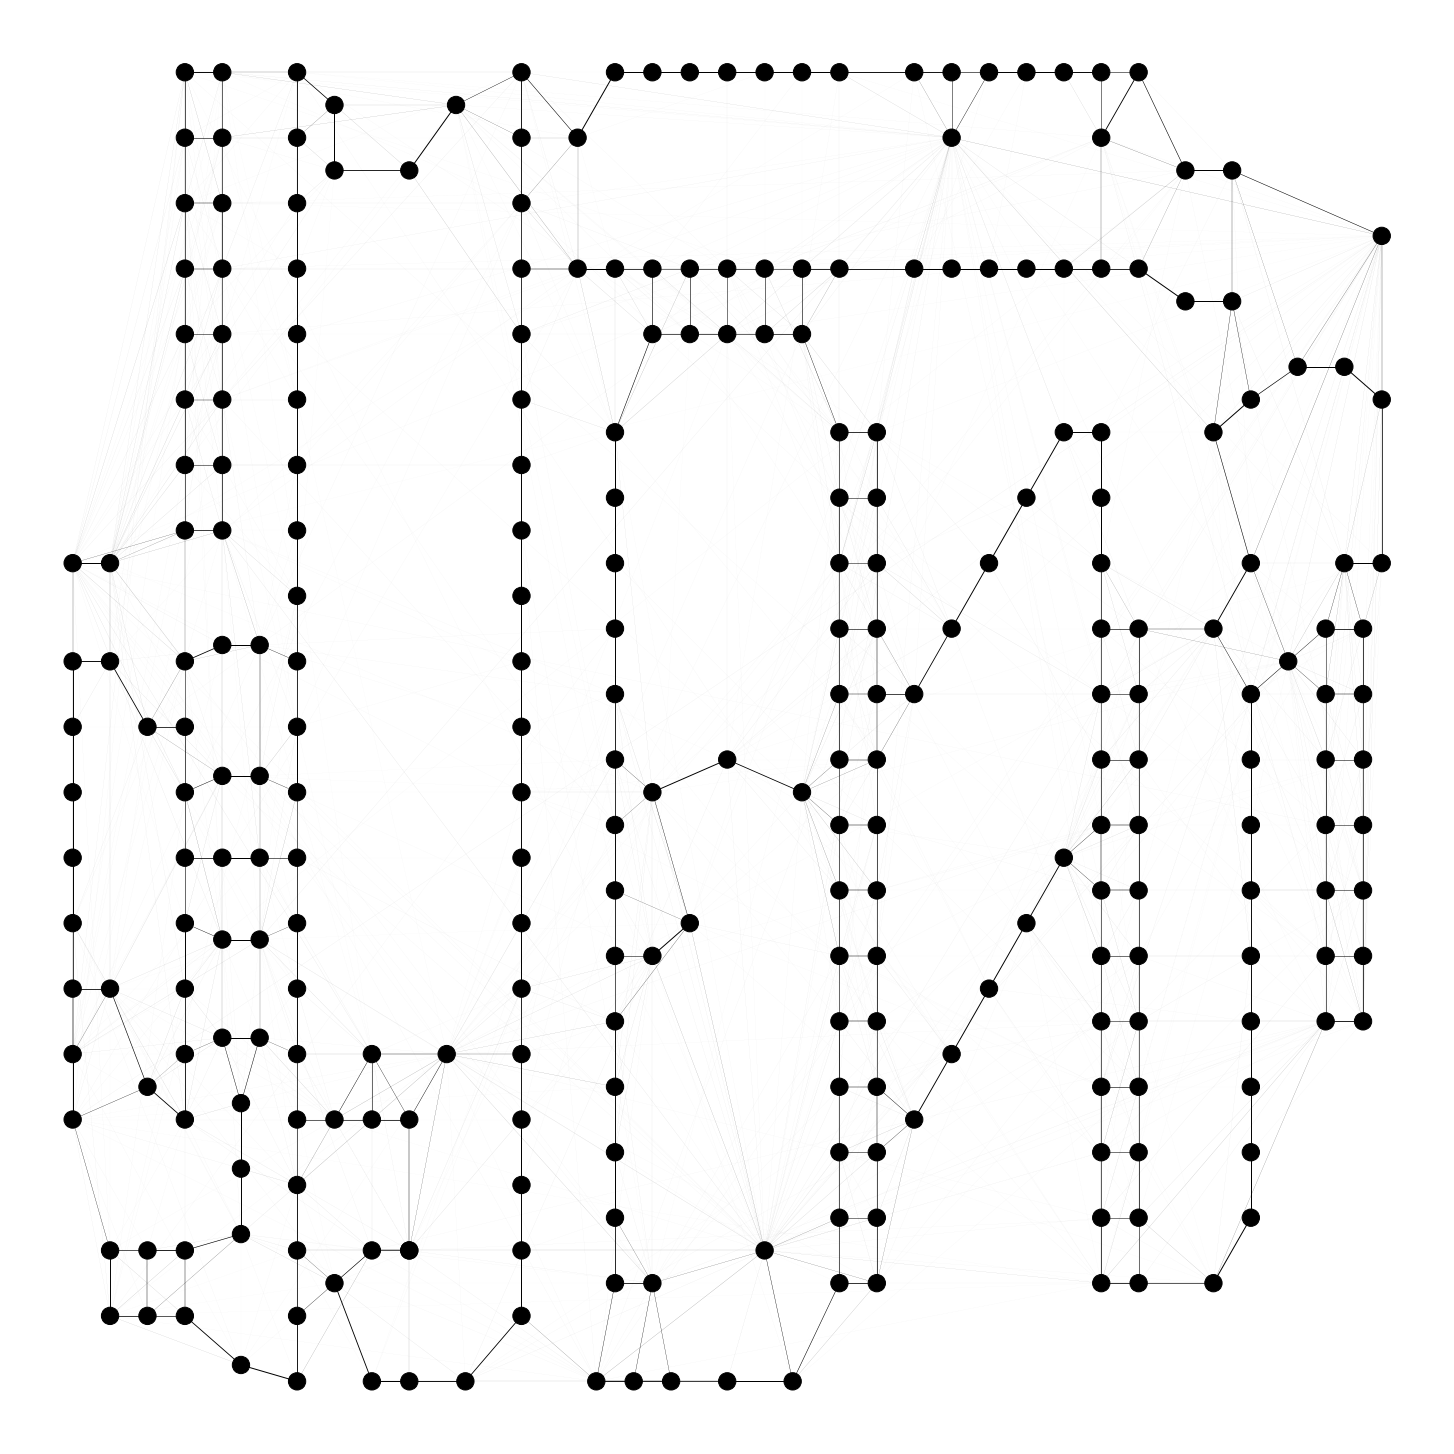

In [22]:
pos = [(G.nodes[p]['pos'][0], G.nodes[p]['pos'][1]) for p in G.nodes()]
weights = [G[u][v]['weight']/100 for u,v in G.edges()]
plt.figure(figsize=(20,20))
nx.draw(G, node_color=['black']*len(G.nodes()), pos=pos, width=weights)
plt.show()